In [1]:
import pandas as pd

In [2]:
import numpy as np

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv("car data.csv")

In [78]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [79]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [80]:
df["Owner"].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [81]:
df=df.drop(["Owner","Car_Name"],1)

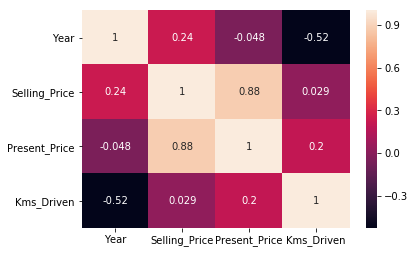

In [82]:
numerical=df.select_dtypes(include=np.number)
categorical=df.select_dtypes(exclude=np.number)
categorical=pd.get_dummies(categorical)
df=pd.concat([numerical,categorical],1)
sns.heatmap(numerical.corr(),annot=True)

In [83]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,1,0,1,0,0,1


In [117]:
X=df.drop(["Selling_Price"],1)
y=df["Selling_Price"]

In [118]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,0,1,1,0,0,1
1,2013,9.54,43000,0,1,0,1,0,0,1
2,2017,9.85,6900,0,0,1,1,0,0,1
3,2011,4.15,5200,0,0,1,1,0,0,1
4,2014,6.87,42450,0,1,0,1,0,0,1


In [119]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [120]:
###Normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cols=list(X)
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=cols)
X.head()


,Year,Present_Price,Kms_Driven,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,0.733333,0.057109,0.053053,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.666667,0.099913,0.085085,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.933333,0.103273,0.012813,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.533333,0.041504,0.009409,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.733333,0.070980,0.083984,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [164]:
#train-test-split
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

In [122]:
x_train, x_test, y_train, y_test = tts(X,y,test_size=0.2,random_state=0)

In [123]:
lnr=LinearRegression()

In [124]:
lnr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [125]:
y_pred=lnr.predict(x_test)

In [126]:
r2_score(y_pred,y_test)

0.8950545945788791

In [127]:
knnr=KNeighborsRegressor(n_neighbors=3)
knnr.fit(x_train,y_train)
y_pred=knnr.predict(x_test)
print(r2_score(y_pred,y_test))
cross_val_score(lnr,x_train,y_train,cv=10,scoring="r2").mean()

0.869329235729106


0.7776070538245123

In [128]:
params={"n_neighbors":np.arange(1,16)}
knn_cv=GridSearchCV(knnr,param_grid=params,cv=10,scoring="r2")
knn_cv.fit(x_train,y_train)
knn_cv.best_params_
knn_cv.best_score_

0.8520925034712802

In [129]:
#####Feature Selection
lnr=LinearRegression()

In [130]:
features_rfe=RFE(lnr,5)

In [131]:
features_rfe.fit(X,y)
features_rfe.ranking_

array([1, 1, 1, 4, 1, 6, 5, 2, 3, 1])

In [132]:
cols=pd.Series(cols)
f1=cols[features_rfe.support_]
X1=X[f1]

In [133]:
x_train, x_test, y_train, y_test = tts(X1,y,test_size=0.2,random_state=0)
lnr=LinearRegression()
lnr.fit(x_train,y_train)
x_train.head()

,Year,Present_Price,Kms_Driven,Fuel_Type_Diesel,Transmission_Manual
74,0.733333,0.093303,0.165165,1.0,1.0
239,0.600000,0.044538,0.046464,0.0,1.0
64,0.933333,0.389142,0.011011,1.0,0.0
294,0.733333,0.070221,0.065103,0.0,1.0
286,0.866667,0.082141,0.056194,0.0,1.0


In [134]:
y_pred=lnr.predict(x_test)

In [135]:
r2_score(y_pred,y_test)

0.8796390544713537

In [136]:
knnr=KNeighborsRegressor(n_neighbors=3)
knnr.fit(x_train,y_train)
y_pred=knnr.predict(x_test)
print(r2_score(y_pred,y_test))
cross_val_score(lnr,x_train,y_train,cv=10,scoring="r2").mean()

0.8614179709755854


0.77217738622031

In [137]:
params={"n_neighbors":np.arange(1,16)}

In [138]:
knn_cv=GridSearchCV(knnr,param_grid=params,cv=10,scoring="r2")

In [139]:
knn_cv.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [140]:
knn_cv.best_params_

{'n_neighbors': 3}

In [141]:
knn_cv.best_score_

0.8416762388661279

In [202]:
###Feature Selection Method 2

In [144]:
import statsmodels.api as sm
X = sm.add_constant(X) #c in y=mx+c
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     311.5
Date:                Sun, 24 Mar 2019   Prob (F-statistic):          1.10e-131
Time:                        16:45:14   Log-Likelihood:                -594.93
No. Observations:                 301   AIC:                             1206.
Df Residuals:                     293   BIC:                             1236.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.9175      0.312     -2.942      0.004      -1.531      -0.304
Year                       6.0451      0.639      9.465      0.000       4.788       7.302
Present_Price             40.2023      1.476     27.237      0.000      37.297      43.107
Kms_Driven                -3.4987      1.617     -2.163      0.031      -6.682      -0.316
Fuel_Type_CNG             -1.3256      0.902     -1.470      0.143      -3.101       0.450
Fuel_Type_Diesel           1.1417      0.426      2.683      0.008       0.304       1.979
Fuel_Type_Petrol          -0.7336      0.382     -1.920      0.056      -1.486       0.019
Seller_Type_Dealer         0.1278      0.206      0.621      0.535      -0.277       0.533
Seller_Type_Individual    -1.0453      0.197     -5.304      0.000      -1.433      -0.657
Transmission_Automatic     0.2566      0.261      0.984      0.326      -0.257       0.770
Transmission_Manual       -1.1741      0.186     -6.314      0.000      -1.540      -0.808
==============================================================================
Omnibus:                       93.414   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              697.351
Skew:                           1.044   Prob(JB):                    3.73e-152
Kurtosis:                      10.158   Cond. No.                     3.16e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [145]:
model.pvalues

const                     3.518301e-03
Year                      1.008229e-18
Present_Price             2.866310e-82
Kms_Driven                3.132499e-02
Fuel_Type_CNG             1.427325e-01
Fuel_Type_Diesel          7.708547e-03
Fuel_Type_Petrol          5.587934e-02
Seller_Type_Dealer        5.348612e-01
Seller_Type_Individual    2.239790e-07
Transmission_Automatic    3.258806e-01
Transmission_Manual       1.006992e-09
dtype: float64

In [148]:
X = X.drop(["const"],1)

In [149]:
cols = list(X)
p_max = 1
while (len(cols)>0):
    p=[]
    X_1= X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = list(model.pvalues.values[1:])
    p = pd.Series(p,index = cols)
    p_max = max(p)
    features_with_p_max = p.idxmax()
    if (p_max>0.05):
        cols.remove(features_with_p_max)
    else:
        break
selected_features = cols
    

In [150]:
selected_features

['Year',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type_Diesel',
 'Seller_Type_Individual',
 'Transmission_Manual']

In [151]:
X2=X[selected_features]

In [153]:
X2.head()

,Year,Present_Price,Kms_Driven,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,0.733333,0.057109,0.053053,0.0,0.0,1.0
1,0.666667,0.099913,0.085085,1.0,0.0,1.0
2,0.933333,0.103273,0.012813,0.0,0.0,1.0
3,0.533333,0.041504,0.009409,0.0,0.0,1.0
4,0.733333,0.070980,0.083984,1.0,0.0,1.0


In [158]:
x_train, x_test, y_train, y_test = tts(X2,y,test_size=0.2,random_state=0)
lnr=LinearRegression()
lnr.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [159]:
y_pred=lnr.predict(x_test)
r2_score(y_pred,y_test)

0.895058467541179

In [160]:
knnr=KNeighborsRegressor(n_neighbors=3)
knnr.fit(x_train,y_train)
y_pred=knnr.predict(x_test)
print(r2_score(y_pred,y_test))
cross_val_score(lnr,x_train,y_train,cv=10,scoring="r2").mean()

0.869329235729106


0.7769431712053698

In [162]:
params={"n_neighbors":np.arange(1,16)}
knn_cv=GridSearchCV(knnr,param_grid=params,cv=10,scoring="r2")
knn_cv.fit(x_train,y_train)
knn_cv.best_score_

0.8518255208574598

In [163]:
#Best Model is the one that uses Linear Regression alongwith feature selection

In [169]:
#lasso
lasso = LassoCV(alphas=np.arange(0.1,2,0.1))
lasso.fit(x_train,y_train)
pred=lasso.predict(x_test)
lasso.score(x_test,y_test)

0.83248272176899

In [172]:
ridge = RidgeCV(alphas = np.arange(0.1,2,0.1))
ridge.fit(x_train,y_train)
ridge.score(x_test,y_test)

0.9036150365215191

In [ ]:
#Best Model is the one that uses Ridge Regression alongwith feature selection